In [69]:
#LAUNCH JUPYER WITH COMMAND BELOW OR IT MAY HAVE DIFFICULTY TO EXECUTE THE CODE

jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [70]:
#LIBRARIES:
#networkx : is a library used to create directional verteces that will be used in the Genetic Algorithm for optimization later
#numpy : for array management
#pandas : to load *.csv and convert data
#time : to calculate time between iteration and global computation time
#matplotlib.pyplot : for graphs
#copy : for true copy of variables and arrays
#heapq : used in main Loop in order to select best Chromosome for Genetic Algorithm iterations
#math : for calculation

In [71]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy
import heapq
import math

In [72]:
#ORIGINAL FILE WAS CONVERTED INTO DIFFERENT *.csv files
#"project.csv" this is the table with all the connections between stations and the trip duration between
#"nameTable" : table with the name of the stations and the index code seen in project.csv
#"outsideParis" : list of the stations beyond the border of paris ("Mairie d'Ivry" for example)
#insideParis" : list of the stations inside paris
#There are 376 rows in project corresponding to connections between 2 stations
#There are 296 rows if you remove those outside Paris
#There are 45 stations with a different name
#Finally, Inside Paris there 251 different stations with all a different name

In [73]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/project_correction.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')
outsideParis = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation_outsideParis.csv', sep =';')
insideParis = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStationParis_corrected.csv', sep =';')

df.tail(3)

,Station,Connection,Time
930,355,354,120
931,366,367,120
932,367,366,120


In [74]:
df.dtypes

Station       int64
Connection    int64
Time          int64
dtype: object

In [75]:
len(np.unique(insideParis.nameStation))

242

In [76]:
nameTable.head()

,indexStation,nameStation,InParis
0,0,Abbesses,1
1,1,Alexandre Dumas,1
2,2,Alma Marceau,1
3,3,Alésia,1
4,4,Anatole France,1


In [77]:
outsideParis.head(3)

,indexStation,nameStation,InParis
0,10,"Aubervilliers-Pantin, Quatre Chemins",0
1,15,Basilique de Saint-Denis,0
2,25,Billancourt,0


In [78]:
#CREATION OF THE GRAPH with networkx, I use a Multiple directed graph, 
# it means that a node can have multiple connections with different nodes and the direction matters
#for example 34 connect with 248 but 248 doesnt connect with 34

In [79]:
MG = nx.MultiDiGraph()

In [80]:
#CREATION OF THE EDGES
#using the df table I create the edges inside the Graph named MG (see above), 
#the weight will be the Time spent between two stations

In [81]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [82]:
MG

In [83]:
len(np.unique(outsideParis.nameStation))

45

In [84]:
#THE EDGES ARE REPRESENTED BY A DICTIONNARY

In [85]:
print(MG.adj)

{0: {238: {0: {'weight': 41}}, 159: {0: {'weight': 46}}}, 238: {322: {0: {'weight': 27}}, 0: {0: {'weight': 41}}, 239: {0: {'weight': 120}}}, 159: {0: {0: {'weight': 46}}, 147: {0: {'weight': 44}}}, 1: {12: {0: {'weight': 36}}, 235: {0: {'weight': 44}}}, 12: {213: {0: {'weight': 42}}, 1: {0: {'weight': 36}}}, 235: {1: {0: {'weight': 44}}, 284: {0: {'weight': 44}}}, 2: {110: {0: {'weight': 69}}, 139: {0: {'weight': 50}}}, 110: {332: {0: {'weight': 37}}, 2: {0: {'weight': 69}}, 109: {0: {'weight': 120}}}, 139: {2: {0: {'weight': 50}}, 355: {0: {'weight': 46}}}, 3: {262: {0: {'weight': 33}}, 210: {0: {'weight': 41}}}, 262: {3: {0: {'weight': 33}}}, 210: {3: {0: {'weight': 41}}, 95: {0: {'weight': 48}}}, 4: {171: {0: {'weight': 43}}, 251: {0: {'weight': 35}}}, 171: {264: {0: {'weight': 49}}, 4: {0: {'weight': 43}}}, 251: {4: {0: {'weight': 35}}}, 5: {13: {0: {'weight': 67}}, 239: {0: {'weight': 54}}}, 13: {151: {0: {'weight': 57}}, 5: {0: {'weight': 67}}, 14: {0: {'weight': 120}}}, 239: {5

In [86]:
#networkx can plot a graph with connections and directions between different nodes

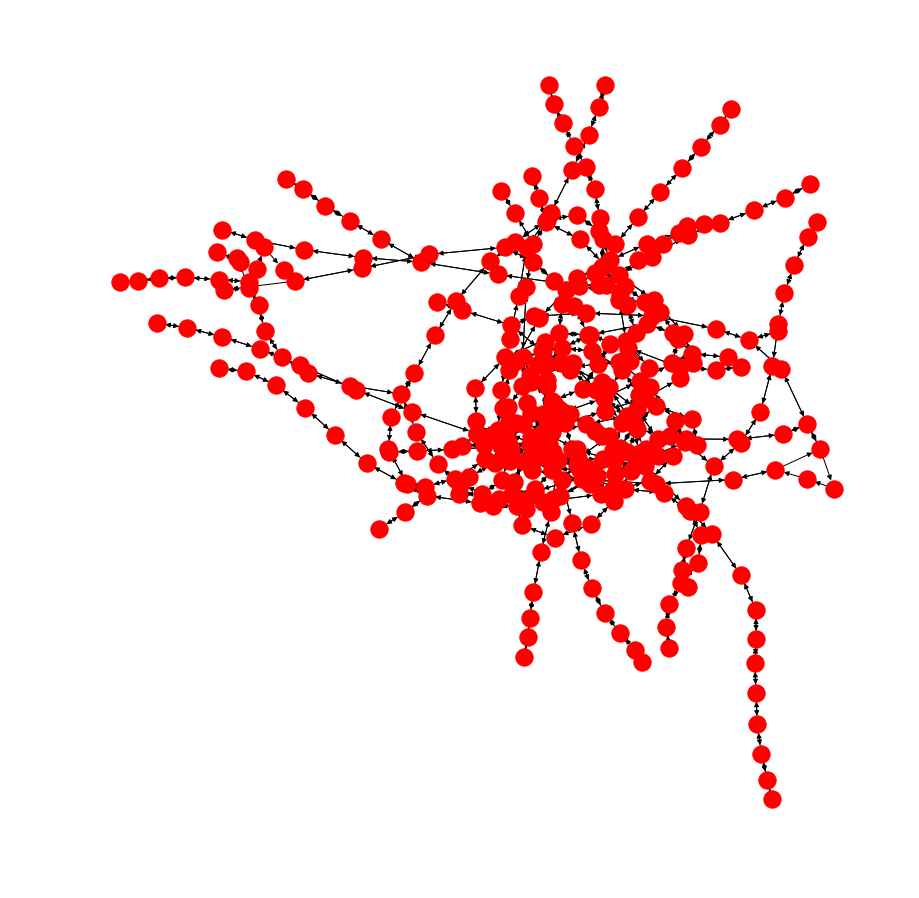

In [87]:
plt.figure(figsize=(12,12))
nx.draw(MG, label=False)

plt.show()

In [88]:
#The Johnson's algorithm will give shortest paths between stations for every verteces
#I used it because it's fast, and usable with weight and directions

https://en.wikipedia.org/wiki/Johnson%27s_algorithm

In [89]:
shortestMulti = nx.johnson(MG)

In [90]:
shortestMulti[375]

{0: [375, 310, 342, 65, 121, 124, 14, 64, 192, 191, 147, 159, 0],
 1: [375, 310, 309, 8, 350, 312, 229, 305, 285, 284, 235, 1],
 2: [375, 165, 70, 67, 173, 227, 356, 77, 50, 109, 110, 2],
 3: [375, 165, 70, 73, 330, 222, 323, 334, 333, 208, 361, 292, 95, 210, 3],
 4: [375,
  310,
  309,
  336,
  38,
  289,
  223,
  132,
  327,
  103,
  367,
  189,
  370,
  286,
  264,
  171,
  4],
 5: [375, 310, 342, 65, 121, 124, 14, 13, 5],
 6: [375, 165, 70, 67, 173, 227, 356, 77, 50, 109, 127, 55, 6],
 7: [375, 310, 309, 8, 7],
 8: [375, 310, 309, 8],
 9: [375, 165, 70, 67, 173, 227, 356, 77, 78, 9],
 10: [375, 310, 342, 65, 121, 123, 63, 169, 341, 300, 87, 82, 277, 10],
 11: [375, 165, 70, 73, 330, 222, 221, 174, 346, 358, 99, 349, 154, 11],
 12: [375, 310, 309, 8, 350, 312, 229, 305, 285, 284, 235, 1, 12],
 13: [375, 310, 342, 65, 121, 124, 14, 13],
 14: [375, 310, 342, 65, 121, 124, 14],
 15: [375,
  310,
  309,
  336,
  38,
  289,
  223,
  132,
  327,
  326,
  168,
  245,
  153,
  131,
  272,
 

In [91]:
#MAIN CLASS DEFINITION: Chromosome, it represents a set of nodes(genes).
#******-------------------------------------------------------------------******
#the class function __ini__ is the constructor of the class, it demands a set of stations(index)
#----------------------------------------------------------------------------
#the shuffleGenes is a function in order to shuffle the nodes/genes in the chromosome
#-------------------------------------------------------------------------------
#mutationGene : is a fuction that permits to mutate some gene in the sequence of the chromosome, thanks to a probability  Pm.
#the function "reads" the chromosome from the beginning, nade after node, then a probability is done (randomly), if it is below
#a Threshold Pm that gene will be mutated
#Mutation adds some randomness to a chromosome and brings some variety into the population
#---------------------------------------------------------------------------------
#pathWay : This function creates the optimal pathway between 2 nodes using the dictionnary created with networkx (see above)
#For example between 2 nodes (3,47) the optimal pathway calculated by Johnson's algorithm 
#will be [3, 210, 95, 292, 361, 208, 333, 334, 323, 222, 221, 74, 195, 47]
#THE CHROMOSOME IS ENCODED LIKE THAT
#Chromosome  = |23|45|156|176 etc..... and pathway give the optimal path from 23 to 45, 45 to 156, 156 to 176...... 
#as a numpy.array
#This way, the Genetic Algorithm can optimize the "genes" and there will always be a link between stations
#-----------------------------------------
#__repr__ : it's a function to overload the print function for an object of Chromosome's class
#example
#--------------------
#test = Chromosome([1,2,3,4,5])
#print(test)
#output >> Chromosome :|1|2|3|4|5|

In [92]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes       
    
    def shuffleGenes(self):
        random.shuffle(self.nodes)   
    
    #Order Changing Mutation, 1 gene is selected thanks to Pm probability
    def mutationGene(self, Pm, inParis):
        self.inParis = inParis
        self.Pm = Pm
        for i in range(0, len(self.nodes)):
            self.randMutate = random.random()
            if self.randMutate < self.Pm:
                self.indexMutation = random.randint(0,len(self.inParis)-1)
                self.mutateTo = self.inParis[self.indexMutation]
                self.nodes[i] = self.mutateTo


    def pathWay(self, Multigraph): #Multigraph comes from the Johnson Networkx calculation for shortest path between 2 nodes
        self.Multigraph = Multigraph
        self.totalPath = []
        for i in range(0, len(self.nodes)-1):        
            if i+1 is not None:
                self.totalPath = merge(self.totalPath, self.Multigraph[self.nodes[i]][self.nodes[i+1]])   
        return self.totalPath       
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes

In [93]:
#FUNCTION PathwayDuration : calculate the path time for a chromosome
#-----------------------------------------------------------------
#PARAMETERS :
#chromosome : the object of class Chromosome to use
#multipath : the Dictionary of shortest path between nodes
#mainDataframe : dataframe with connection between stations and traveling time (here it is called "df")
#Returns the total time in seconds shouldnt be > 72000 (20 hours from 5AM to 1AM)

In [94]:
def PathwayDuration(chromosome, multipath, mainDataframe):
    b = 0
    for i in range(1, len(chromosome.pathWay(multipath))):
        a = np.array(df['Time'].loc[(mainDataframe.Station == chromosome.pathWay(multipath)[i-1]) & 
                               (mainDataframe.Connection == chromosome.pathWay(multipath)[i])].values)
        b = b + a 
    return int(b)

In [95]:
#FUNCTION crossoverSinglePoint:
#A function that returns 1 child chromosome from 2 parents chromosomes
#2 chromosomes are splitted halfway then for example
#Chrom 1 = A|B|C|D and chrom2 = E|F|G|H then we obtain : A|B + G|H
#Child1 = A|B|G|H and if you permute chromosomes in a second call you obtain child2 = E|F|C|D

In [96]:
def crossoverSinglePoint(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = np.append(chromo1.nodes[0:lenChromo], chromo2.nodes[lenChromo:len(chromo1.nodes)])
    return childrenChr    

In [97]:
#FUNCTION merge:
#works with np.array
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]
#

In [98]:
def merge(a, b): #a,b are numpy.array
    c = a[:-1] + b[:]
    return c    

In [99]:
#FUNCTION NewNameFit2
#return the score to maximize, 1 = best answer, it means that all stations with a different name, have been visited
#There are 251 stations inside paris with a different name, I divide unique name from the list of the nodes by 251,
#in order to obtain my score.
#the len() is here to prevent the pathway to go beyond 1200 stations visited that could take mora than 20 hours to visit all
#Remark : fitScore = 0 if there is a station visited outside paris and if the length of the chromosome goes beyond 1200(too long)

In [100]:
def NewNameFit2(uniqueNodeName, chromosome, MultiG, uniqueNodeIndex):
    if len(chromosome.pathWay(MultiG)) < 1200:
        NameList = np.array([])
        for i in chromosome.pathWay(MultiG):
            a, = np.where(uniqueNodeIndex == i)
            NameList = np.append(NameList, uniqueNodeName[a])
            fitScore = len(np.unique(NameList)) / 242
    else:
        fitScore = 0
    return fitScore

In [101]:
len(np.unique(nameTable.nameStation))

296

In [102]:
z = np.array([2,2])
np.max(z)

2

In [103]:
#***********________________________________________******************
#***********___MAIN LOOP OF THE GENETIC ALGORITHM___******************
#***********________________________________________******************
#First a population is generated, a population is a set of chromosome with a sequence of different nodes/genes for each
#population is an array of objects of class Chromosome()
#population will evolve at each iteration of the genetic algorithm
#*****-----------------------------------------------------------------
#Then, from the initial population 2(could be changed) best scores are kept, 
#and From the 10(can be changed) best candidates 18 children are created with the crossover Function according to the function :
# ABCD and EFGH gives ABGH, EFCD,  
#Finally, depending to a probability (here 0.3), a chromosome can be selected for mutation then each of its gene can
#be mutated with Pm probability, for example if the chromosome has a length of 100 and the probability for a gene to mutate is
#Pm = 0.1 there will an average of 10 genes mutated, can be lower or higher depends of the value of Pm sent to the function
#***********------------------------------------------------------------
#FINALLY, we obtain a new population composed of Chrildren Chromosome and 2 best Chromosomes from the former population and each
#chromosome could be mutated or not
#Then the new population will have a new iteration etc.....

In [104]:
#NEW ALGO split avec duplicate CROSSOVER SINGLE POINT
#MAIN LOOP
population = np.array([]) #initialization of the population array
#startGene = 69
#midGene = 69
X_opti = np.array([]) #initialization of X axis for the graph
Y_opti = np.array([]) #initialization of Y axis for the graph

#CREATION OF THE INITIAL POPULATION
for i in range(0, 100):
    tmpNode = np.random.choice(insideParis.indexStation, 60, replace=False)
    tmpC = Chromosome(tmpNode)
    population = np.append(population, tmpC)
    fitList = np.array([])
    fitList = np.append(fitList, NewNameFit2(insideParis.nameStation, population[i], shortestMulti, insideParis.indexStation))
    print('Pop init', fitList)
#MAIN LOOP here population evolved continuously with crossovers and mutations
#NUMBER OF ITERATION z
for z in range(0,500):
    fitList = np.array([])
    
    #fitList = array of the score of the population
    for i in range(0,len(population)):
        fitList = np.append(fitList, NewNameFit2(insideParis.nameStation, population[i], shortestMulti, insideParis.indexStation))
        
    #select the 10 best chromosomes according to their scores, the array is ordered from higher to lower score
    IndexfitBest = heapq.nlargest(10, range(len(fitList)), fitList.take)
    population_best = np.take(population, IndexfitBest)
    
    #initialization of the selected chromosomes with 2 best chromosomes
    child = np.array([population_best[0], population_best[1]]) #2 best chromosomes kept
    
    #Creation of the children :
    for u in range(1, len(population_best)):
        crossChr1 = Chromosome(crossoverSinglePoint(population_best[u-1], population_best[u]))
        crossChr2 = Chromosome(crossoverSinglePoint(population_best[u], population_best[u-1]))
        child = np.append(child, crossChr1)
        child = np.append(child, crossChr2)
    population = child
    
    #Mutation each chromosome has 30% to be selected for mutation
    for mutIter in range(0, len(population)-1):
        rand = random.random()
        if rand < 0.2:
            population[mutIter].mutationGene(0.1, insideParis.indexStation) # a mutation has 10% chance to occur
    print(np.max(fitList)) #Print the best score of the best candidate
    X_opti = np.append(X_opti, z) #keep track of iterations
    Y_opti = np.append(Y_opti, np.max(fitList)) #keep track of the best score obtained
    print('Iteration {}:'.format(z, fitList)) #print iteration number and max score for the iteration
    print(fitList)
print(population)


Pop init [0.73966942]
Pop init [0.80165289]
Pop init [0.78512397]
Pop init [0.74793388]
Pop init [0.7892562]
Pop init [0.74380165]
Pop init [0.79338843]
Pop init [0.75206612]
Pop init [0.78099174]
Pop init [0.76446281]
Pop init [0.7107438]
Pop init [0.73966942]
Pop init [0.74793388]
Pop init [0.75206612]
Pop init [0.69834711]
Pop init [0.75206612]
Pop init [0.70661157]
Pop init [0.81818182]
Pop init [0.75619835]
Pop init [0.7231405]
Pop init [0.76033058]
Pop init [0.76033058]
Pop init [0.72727273]
Pop init [0.74793388]
Pop init [0.78512397]
Pop init [0.7107438]
Pop init [0.70661157]
Pop init [0.69834711]
Pop init [0.78099174]
Pop init [0.71900826]
Pop init [0.74380165]
Pop init [0.76033058]
Pop init [0.71487603]
Pop init [0.76446281]
Pop init [0.79338843]
Pop init [0.74793388]
Pop init [0.80578512]
Pop init [0.73966942]
Pop init [0.7768595]
Pop init [0.7768595]
Pop init [0.71487603]
Pop init [0.74793388]
Pop init [0.78099174]
Pop init [0.73966942]
Pop init [0.76033058]
Pop init [0.7190

0.8884297520661157
Iteration 20:
[0.88842975 0.88842975 0.88842975 0.88842975 0.88842975 0.88842975
 0.88842975 0.88842975 0.88429752 0.88842975 0.88016529 0.88429752
 0.88429752 0.84297521 0.87190083 0.86363636 0.88429752 0.88429752
 0.88429752 0.88429752]
0.8966942148760331
Iteration 21:
[0.88842975 0.87190083 0.85950413 0.81818182 0.89669421 0.88842975
 0.88842975 0.83884298 0.88842975 0.88429752 0.88842975 0.88842975
 0.88842975 0.88842975 0.88842975 0.88842975 0.88842975 0.85123967
 0.88429752 0.88842975]
0.8966942148760331
Iteration 22:
[0.89669421 0.88842975 0.89669421 0.88842975 0.88842975 0.88842975
 0.88842975 0.88842975 0.88842975 0.88842975 0.88842975 0.88842975
 0.88842975 0.88842975 0.88842975 0.88842975 0.88842975 0.84710744
 0.88842975 0.88842975]
0.9008264462809917
Iteration 23:
[0.89669421 0.89669421 0.85950413 0.89669421 0.89669421 0.88842975
 0.88842975 0.88842975 0.83884298 0.90082645 0.88842975 0.88842975
 0.88842975 0.85123967 0.88842975 0.88842975 0.88842975 0.8

0.9214876033057852
Iteration 52:
[0.9214876  0.9214876  0.90082645 0.88429752 0.91322314 0.9214876
 0.91322314 0.91322314 0.91322314 0.91322314 0.88429752 0.86363636
 0.91322314 0.91322314 0.81818182 0.91322314 0.91322314 0.90495868
 0.91322314 0.91322314]
0.9214876033057852
Iteration 53:
[0.9214876  0.9214876  0.9214876  0.9214876  0.9214876  0.9214876
 0.91322314 0.9214876  0.8677686  0.91322314 0.91322314 0.91322314
 0.91322314 0.91322314 0.89256198 0.91322314 0.91322314 0.91322314
 0.91322314 0.91322314]
0.9214876033057852
Iteration 54:
[0.9214876  0.90909091 0.9214876  0.9214876  0.9214876  0.9214876
 0.9214876  0.9214876  0.90082645 0.9214876  0.91322314 0.9214876
 0.9214876  0.88842975 0.91322314 0.9214876  0.91322314 0.91322314
 0.91322314 0.91322314]
0.9214876033057852
Iteration 55:
[0.9214876  0.9214876  0.88429752 0.9214876  0.9214876  0.89256198
 0.9214876  0.89669421 0.9214876  0.9214876  0.9214876  0.9214876
 0.9214876  0.9214876  0.9214876  0.9214876  0.9214876  0.921487

0.9380165289256198
Iteration 85:
[0.9214876  0.93801653 0.93801653 0.93801653 0.93801653 0.93801653
 0.91735537 0.93801653 0.93801653 0.93801653 0.93801653 0.93801653
 0.93801653 0.93801653 0.93801653 0.93801653 0.93801653 0.93801653
 0.93801653 0.93801653]
0.9380165289256198
Iteration 86:
[0.93801653 0.90495868 0.93801653 0.93801653 0.93801653 0.93801653
 0.93801653 0.93801653 0.9338843  0.93801653 0.91322314 0.93801653
 0.88429752 0.89256198 0.91735537 0.8677686  0.93801653 0.93801653
 0.93801653 0.93801653]
0.9380165289256198
Iteration 87:
[0.93801653 0.93801653 0.93801653 0.88016529 0.88842975 0.93801653
 0.93801653 0.93801653 0.93801653 0.91735537 0.93801653 0.93801653
 0.93801653 0.93801653 0.93801653 0.93801653 0.93801653 0.93801653
 0.93801653 0.93801653]


KeyboardInterrupt: 

In [ ]:
insideParis.nameStation[296]

In [ ]:
population[0]

In [ ]:
len(np.unique(nameTable.nameStation))

In [ ]:
#Thanks to X_opti and Y_opti we can draw the graph
#With the number of iterations on the X axis and the number of different stations visited on the Y axis

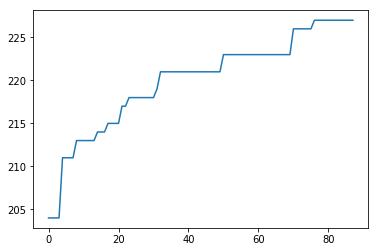

In [106]:
plt.plot(X_opti, Y_opti * 242)
plt.show()

In [ ]:
fitList

In [ ]:
population[1]

In [ ]:
print(PathwayDuration(population[0],shortestMulti, df )/3600)

In [ ]:
print(np.sort(np.unique(population[0].pathWay(shortestMulti))))

In [ ]:
print(*population[0].pathWay(shortestMulti))

In [ ]:
NewNameFit2(nameTable.nameStation, population[0], shortestMulti)

In [ ]:
len(np.unique(nameTable.nameStation))

In [ ]:
len(population[0].pathWay(shortestMulti))

In [ ]:
print(*np.sort(np.unique(population[1].pathWay(shortestMulti))))

In [ ]:
13 * 23 + 9

In [ ]:
544 * 66

In [ ]:
1/ 251 * 7